In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import t

In [8]:
df = pd.read_excel("coba.xlsx")
print(df)

    total_x1  total_x2  total_x3  total_x4  total_y / Yi
0         31        19        11         8             7
1         35        23        14         8             9
2         31        20        13         7             8
3         28        14         4         4             2
4         36        20         7         5             4
5         29        20        11         6             5
6         30        19         9         7             6
7         35        21        13         8             8
8         33        19        10         9             8
9         39        24        15         9            10
10        30        18         8         7             6
11        20        16         7         8             5
12        33        20        12         7             7
13        30        19         9         7             6
14        27        19         6         6             6
15        23        13         8         6             3
16        16        14        1

In [9]:
Xvar = df[['total_x1','total_x2','total_x3','total_x4']]
Xvar = sm.add_constant(Xvar)
Yvar = df['total_y / Yi']
olsmod = sm.OLS(Yvar,Xvar).fit()
df['Ypredict'] = olsmod.predict(Xvar)
df['Residual'] = olsmod.resid
print(df)

    total_x1  total_x2  total_x3  total_x4  total_y / Yi  Ypredict  Residual
0         31        19        11         8             7  6.931153  0.068847
1         35        23        14         8             9  8.870629  0.129371
2         31        20        13         7             8  7.214950  0.785050
3         28        14         4         4             2  1.879062  0.120938
4         36        20         7         5             4  4.907163 -0.907163
5         29        20        11         6             5  6.406258 -1.406258
6         30        19         9         7             6  6.089547 -0.089547
7         35        21        13         8             8  7.933606  0.066394
8         33        19        10         9             8  7.148583  0.851417
9         39        24        15         9            10  9.786373  0.213627
10        30        18         8         7             6  5.522492  0.477508
11        20        16         7         8             5  5.394957 -0.394957

In [10]:
# Normalitas Residual
n_stats, p_val = sm.stats.diagnostic.kstest_normal(
    df['Residual'],dist='norm', pvalmethod='table'
    )
print('P_value Kolmogorov-Smirnov :', round(p_val,3))

if p_val > 0.05:
    print ("Data terdistribusi normal")
elif p_val < 0.05:
    print ("Data terdistribusi tidak normal")

P_value Kolmogorov-Smirnov : 0.176
Data terdistribusi normal


In [11]:
# Uji T
print("Uji T untuk variabel independen:")
print("total_x1:", olsmod.tvalues['total_x1'])
print("total_x2:", olsmod.tvalues['total_x2'])
print("total_x3:", olsmod.tvalues['total_x3'])
print("total_x4:", olsmod.tvalues['total_x4'])
print("Constant:", olsmod.tvalues['const'])

total_x1 = olsmod.tvalues['total_x1']
total_x2 = olsmod.tvalues['total_x2']
total_x3 = olsmod.tvalues['total_x3']
total_x4 = olsmod.tvalues['total_x4']
const = olsmod.tvalues['const']


Uji T untuk variabel independen:
total_x1: -1.123011689435214
total_x2: 5.397862551880279
total_x3: 3.011842212464809
total_x4: 5.464965372406945
Constant: -5.5392349224596


[Text(0.5, 1.0, 'Predict vs Residual')]

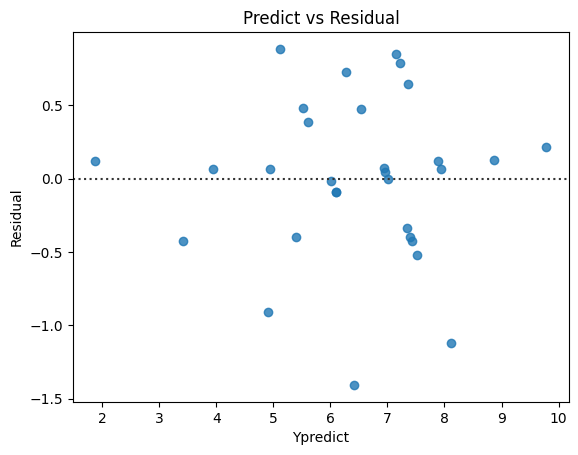

In [12]:
# Uji Heteroskedastisitas
sns.residplot(x=df["Ypredict"], y=df["Residual"]).set(title='Predict vs Residual')

In [13]:
# Uji auto korelasi
durbinWatson = durbin_watson(df["Residual"])
print("Uji Auto Korelasi :", durbinWatson)

Uji Auto Korelasi : 1.8702692972403494


In [14]:
# Nilai Linear Regression
bebas = ['total_x1','total_x2','total_x3','total_x4']
X = df[bebas]
y = df['total_y / Yi']

model = LinearRegression().fit(X,y)

koefisien = model.coef_
intercept = model.intercept_

print("Intercept : ", intercept)
list(zip(bebas, koefisien))

Intercept :  -5.088621219475435


[('total_x1', -0.03291429653975283),
 ('total_x2', 0.36996794387552745),
 ('total_x3', 0.1970872948898327),
 ('total_x4', 0.4803457761368489)]

In [15]:
# Uji R
r_squared = model.score(X,y)
print("Uji R: ",r_squared)

Uji R:  0.8957579476564601


In [16]:
k = 4
n = len(df)- k

In [17]:
# Membuat DataFrame untuk tabel uji t
df_t = pd.DataFrame(columns=['dk', 'α=0.05'])
df_t['dk'] = [i for i in range(1, 31)]

# Menghitung nilai kritis t untuk setiap derajat kebebasan
df_t['α=0.05'] = [round(t.ppf(0.975, df), 3) for df in df_t['dk']]

# Menampilkan tabel uji t
# print(df_t)

# Menampilkan nilai kritis t saat dk = 26
nilai_t = df_t[df_t['dk'] == n]['α=0.05'].values[0]
print("Nilai t tabel dari", n ,"adalah", nilai_t)


Nilai t tabel dari 26 adalah 2.056


In [18]:
if total_x1 > nilai_t:
    print("Nilai total_x1 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x1 tidak berpengaruh pada terhadap Y.")
    
if total_x2 > nilai_t:
    print("Nilai total_x2 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x2 tidak berpengaruh pada terhadap Y.")
    
if total_x3 > nilai_t:
    print("Nilai total_x3 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x3 tidak berpengaruh pada terhadap Y.")
    
if total_x4 > nilai_t:
    print("Nilai total_x4 berpengaruh pada terhadap Y.")
else:
    print("Nilai total_x4 tidak berpengaruh pada terhadap Y.")

Nilai total_x1 tidak berpengaruh pada terhadap Y.
Nilai total_x2 berpengaruh pada terhadap Y.
Nilai total_x3 berpengaruh pada terhadap Y.
Nilai total_x4 berpengaruh pada terhadap Y.
